
**DEFINING THE QUESTION**


**Describe the Data Analysis Question**

Understand the mobile usage in Ivory Coast . Ivory Coast also known as Côte d'Ivoire is a country in West Africa. Deciding on which city to select will assist to inform strategy to be used by MTN Cote d'Ivoire in upgrading its technology infrastructure.


**Define Metric for Success** 

The main objective of this project is to improve Telecommunication Services across mobile users in Ivory coast and drive more revenue to the MTN Cote d'Ivoire telecommunication company.
For objective to be meet we have to pinpoint the following:

Which city has the highest user traffic ?
Which city has the lowest user traffic ?
Which products are offered by MTN ?
Which MTN product is mostly used per city ?
Which MTN product is not mostly used per city ?
Which time of the day there is more traffic coming from users?
Which time of the day there is less traffic from the users ?
Which Cell has high coverage ?
Which Cell has low coverage ?
Which Cell is receiving the most traffic ?
Which areas support the Fibre optic ?


**Understanding the context**

MTN Côte d'Ivoire, a leading telecom company is looking forward to upgrading its technology infrastructure for its mobile users in Ivory Coast. As a data scientist, I am charged with the responsibility for assisting MTN to implement a suitable upgrading strategy within given cities by understanding mobile usage in them.

**Recording the experimental design**

Import Libraries

Load datasets

Clean Datasets by:
Changing the column names,
Change to lower case,
Changing Column Title for datasets,
Drop unnecessary columns,
Check for missing data,
Check for duplicates,
Drop duplicate if present,
Concatenating the three datasets,
Merge telcom dataset with geo data on site code attribute,
Explore cities with highest traffic per region and per zone,
Upon identifying high traffic cities, explore which product usage per city,
Explore peak hours per day in high traffic cities,
Splitting date and time,







**Data Analysis**

**Dependencies**

At this stage we  import libraries that we rely on so as to develop a solution for this problem.
Some of these libraries are :
NumPy / pandas; assist us to treat and explore the data, and execute vector and matrix operations.

matplotlib / seaborn; a tool that will help to plot the information so we can visualize it in various ways and have a better understanding of it.

Plotly; assist us in plotting data in a fancy way.

sklearn; Will provide all necessary tools to train our models and test them afterwards.

In [ ]:
#import python libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

**Loading our Datasets**

In [ ]:
#Download and upload the data
#To load the Datasets
#To Preview the dataset
df=pd.read_csv('/content/Telcom_dataset.csv')
df.head()

,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [ ]:
#To load the second dataset
#To preview the dataset
df2=pd.read_csv('/content/Telcom_dataset2.csv')
df2.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
#To load the third dataset
#To preview the dataset

df3=pd.read_csv('/content/Telcom_dataset3.csv')
df3.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


In [ ]:
#To load fourth dataset
#To preview the dataset
url='/content/cells_geo.csv'
df4= pd.read_csv(url, sep=";", encoding='utf-8') 
df4.head()



,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
#Drop unnamed column from fourth dataset
df4.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#preview the first five rows after getting rid off unnamed column
df4.head()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
#To load the fifth dataset
#To preview the dataset

url='/content/cells_geo_description.xlsx'
df5=pd.read_excel(url, sheet_name=0, header=0)
df5



,Column name,Description,Format
0,VILLES,City,String
1,STATUS,In Service or not,String
2,LOCALISATION,in ABIDJAN or not,String
3,DECOUPZONE,Geographical Zone,String
4,ZONENAME,Name of Zone,String
5,LONGITUDE,Longitude,Float
6,LATITUDE,Latitude,Float
7,REGION,Region,String
8,AREA,Area,String
9,CELL_ID,ID of the cell,String


In [ ]:
#To the sixth dataset
#To preview the dataset

url='/content/CDR_description.xlsx'
df6=pd.read_excel(url, sheet_name=0, header=0)
df6






,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


**Data Exploration**

In this stage we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured. Also, normalization or will be undertaken in this stage.

In [ ]:
#change column names 
#Change to lower case
#preview column names


df.columns = map(str.lower, df.columns)
df.columns


columns = ['product', 'bill',	'datetime','cell_on_site','caller_anonymized', 'recipient_anonymized', 'country_a','country_b','cell_id', 'site_id']


*Rename attribute names*

In [ ]:
#Rename attribute names for dataset 1
#preview dataset 1

df.columns = columns
df.head()

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [ ]:
#Rename attribute names for dataset 2
#preview dataset

df2.columns=columns
df2.head()


,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
df3.columns=columns
df3.head()

,product,bill,datetime,cell_on_site,caller_anonymized,recipient_anonymized,country_a,country_b,cell_id,site_id
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


*Drop unnecessary columns*

Attribute values of country_a and country_b are similar making it difficult to classify our data. Also, cell_on_site column is not of great importance since we can get it from cell_id.

In [ ]:
#Drop unnecessary attributes

drop = ['cell_on_site' , 'country_a' , 'country_b']
df.drop(drop, axis=1, inplace=True)
df2.drop(drop, axis=1, inplace=True)
df3.drop(drop,axis=1,inplace=True)



In [ ]:
# preview dataset 1
df.head()


,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [ ]:
# preview dataset 2
df2.head()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,sms,0,2012-05-07 23:02:06.0,32255675c3b6fe3,1aa7ae01386e9fb,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,ff16d6ac74c1c64,87d87309c15a8c9,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,98d9f2fb5ff624b,93343ba6e41af95,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,3f9c8a33ec7be1f,7d05a38f89c49d8,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,7bcccc03adf3864,56a5d5430d2fa86,+bO+qkSonO,+bO+qkSonO


In [ ]:
#preview dataset 3
df3.head()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,Voice,61,2012-05-08 23:01:28.0,966f68353622feb,ffd53a3bb2db6f1,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,a0a597384c612d7,cf3b218f1dde792,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,5441a9a58c97132,52f8b299515b9b7,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,8ab8b9ed6989f61,e09e736e46c5c3d,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,52662a62b199334,2186273faab4602,/eeMklgyJA,/eeMklgyJA


*Check for shape and information of the datasets*


In [ ]:
# Shape of datasets df1
df.shape

(5001, 7)

In [ ]:
# check for information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4285 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [ ]:
# shape of dataset df2
df2.shape

(5001, 7)

In [ ]:
# check for information of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4325 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [ ]:
# shape of dataset df3
df3.shape

(5001, 7)

In [ ]:
# check for information of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product               5001 non-null   object
 1   bill                  5001 non-null   int64 
 2   datetime              5001 non-null   object
 3   caller_anonymized     5001 non-null   object
 4   recipient_anonymized  5001 non-null   object
 5   cell_id               5001 non-null   object
 6   site_id               4396 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [ ]:
# shape of dataset df4
df4.shape

(3974, 11)

In [ ]:
# check for information of df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VILLES        3974 non-null   object 
 1   STATUS        3907 non-null   object 
 2   LOCALISATION  3974 non-null   object 
 3   DECOUPZONE    3974 non-null   object 
 4   ZONENAME      3968 non-null   object 
 5   LONGITUDE     3974 non-null   float64
 6   LATITUDE      3974 non-null   float64
 7   REGION        3974 non-null   object 
 8   AREA          3951 non-null   object 
 9   CELL_ID       3974 non-null   object 
 10  SITE_CODE     3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB


In [ ]:
# shape of dataset df5
df5.shape

(11, 3)

In [ ]:
# check for information of df5
df5.info

<bound method DataFrame.info of      Column name                                        Description  Format
0         VILLES                                               City  String
1         STATUS                                  In Service or not  String
2   LOCALISATION                                  in ABIDJAN or not  String
3     DECOUPZONE                                  Geographical Zone  String
4       ZONENAME                                       Name of Zone  String
5      LONGITUDE                                          Longitude   Float
6       LATITUDE                                           Latitude   Float
7         REGION                                             Region  String
8           AREA                                               Area  String
9        CELL_ID                                     ID of the cell  String
10     SITE_CODE  Site (there are several cells per site, severa...  String>

In [ ]:
# shape of dataset df6
df6.shape

(10, 3)

In [ ]:
# check for information of df6
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column name  10 non-null     object
 1   Description  10 non-null     object
 2   Format       10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


*check for datatypes and columns*

In [ ]:
# check for datatypes of dataset df
df.dtypes

product                 object
bill                     int64
datetime                object
caller_anonymized       object
recipient_anonymized    object
cell_id                 object
site_id                 object
dtype: object

In [ ]:
# check for columns for column names of df
df.columns


Index(['product', 'bill', 'datetime', 'caller_anonymized',
       'recipient_anonymized', 'cell_id', 'site_id'],
      dtype='object')

In [ ]:
# check for datatypes of dataset df2
df2.dtypes 

product                 object
bill                     int64
datetime                object
caller_anonymized       object
recipient_anonymized    object
cell_id                 object
site_id                 object
dtype: object

In [ ]:
# check for column names of df2
df.columns

Index(['product', 'bill', 'datetime', 'caller_anonymized',
       'recipient_anonymized', 'cell_id', 'site_id'],
      dtype='object')

In [ ]:
# check for datatypes of df3
df3.dtypes

product                 object
bill                     int64
datetime                object
caller_anonymized       object
recipient_anonymized    object
cell_id                 object
site_id                 object
dtype: object

In [ ]:
# check for column names
df3.dtypes

product                 object
bill                     int64
datetime                object
caller_anonymized       object
recipient_anonymized    object
cell_id                 object
site_id                 object
dtype: object

In [ ]:
# check for datatypes of df4
df4.dtypes

VILLES           object
STATUS           object
LOCALISATION     object
DECOUPZONE       object
ZONENAME         object
LONGITUDE       float64
LATITUDE        float64
REGION           object
AREA             object
CELL_ID          object
SITE_CODE        object
dtype: object

In [ ]:
# check for column names
df4.columns

Index(['VILLES', 'STATUS', 'LOCALISATION', 'DECOUPZONE', 'ZONENAME',
       'LONGITUDE', 'LATITUDE', 'REGION', 'AREA', 'CELL_ID', 'SITE_CODE'],
      dtype='object')

In [ ]:
#check for datatypes
df5.dtypes

Column name    object
Description    object
Format         object
dtype: object

In [ ]:
# check column names
df5.columns

Index(['Column name', 'Description', 'Format'], dtype='object')

In [ ]:
# check for column names
df6.dtypes

Column name    object
Description    object
Format         object
dtype: object

In [ ]:
#check for column names
df6.columns

Index(['Column name', 'Description', 'Format'], dtype='object')

Check for missing values and handling null values

In [ ]:
# check for null values in dataset df1
df.isnull().sum().sort_values(ascending=False)


site_id                 716
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

site_id                 716
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [ ]:
# check for null values in  dataset df2
df2.isnull().sum().sort_values(ascending=False)

site_id                 676
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [ ]:
# check for null values in dataset df3
df3.isnull().sum().sort_values(ascending=False)

site_id                 605
cell_id                   0
recipient_anonymized      0
caller_anonymized         0
datetime                  0
bill                      0
product                   0
dtype: int64

In [ ]:
# check for null values in dataset df4
df4.isnull().sum().sort_values(ascending=False)

STATUS          67
AREA            23
ZONENAME         6
SITE_CODE        0
CELL_ID          0
REGION           0
LATITUDE         0
LONGITUDE        0
DECOUPZONE       0
LOCALISATION     0
VILLES           0
dtype: int64

In [ ]:
#Check for null values in dataset df5
df5.isnull().sum().sort_values(ascending=False)

Format         0
Description    0
Column name    0
dtype: int64

In [ ]:
# check for null values in dataset df6
df6.isnull().sum().sort_values(ascending=False)

Format         0
Description    0
Column name    0
dtype: int64

Checking for duplicates

In [ ]:
# checking for duplicate values in dataset df
df.duplicated().value_counts()





False    4919
True       82
dtype: int64

In [ ]:
# checking for duplicate values in dataset df2
df2.duplicated().value_counts()

False    4923
True       78
dtype: int64

In [ ]:
# checking for duplicate values in dataset df3
df3.duplicated().value_counts()

False    4908
True       93
dtype: int64

In [ ]:
# checking for duplicate values in dataset df4
df4.duplicated().value_counts()

False    3931
True       43
dtype: int64

In [ ]:
# checking for duplicated values in dataset df5
df5.duplicated().value_counts()

False    11
dtype: int64

In [ ]:
# checking for duplicated values in dataset df6
df6.duplicated().value_counts()

False    10
dtype: int64

Dropping Duplicated Values

In [ ]:
# Get rid off duplicated values by dropping
df4.drop_duplicates(inplace=True)
df5.drop_duplicates(inplace=True)
df6.drop_duplicates(inplace=True)


*Concatenating the three datasets*

Join Telcom dataset1 , Telecom dataset2 and Telecom dataset3 using concatenation

In [ ]:
# join the three tables
join=pd.concat( [df, df2, df3] , ignore_index=1)
join

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...
14998,Voice,0,2012-05-09 00:01:43.0,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
14999,Voice,62,2012-05-09 00:01:43.0,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
15000,Voice,32,2012-05-09 00:01:43.0,77f53c39d27c050,9d064f013e2cab2,a4731e780e,d68260ef50
15001,Voice,30,2012-05-09 00:01:43.0,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab


In [ ]:
# preview the first five records in the joined table
join.head()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [ ]:
#preview the last five records in the joined table
join.tail()

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id,site_id
14998,Voice,0,2012-05-09 00:01:43.0,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
14999,Voice,62,2012-05-09 00:01:43.0,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
15000,Voice,32,2012-05-09 00:01:43.0,77f53c39d27c050,9d064f013e2cab2,a4731e780e,d68260ef50
15001,Voice,30,2012-05-09 00:01:43.0,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab
15002,Voice,60,2012-05-09 00:01:43.0,6edeb4c55714650,7e60838216482a7,1c11a2fcbb,6d70dae094


*Join the remaining datasets*

In [ ]:
#join the remaining datasets
#check the sample
join_all= pd.concat([df4,df5,df6], axis=0, join='outer',ignore_index=True)
join_all.head()






,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,Column name,Description,Format
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,NaN,NaN,NaN
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,NaN,NaN,NaN
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17,NaN,NaN,NaN
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f,NaN,NaN,NaN
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f,NaN,NaN,NaN


In [ ]:
# preview the tail values
join_all.tail()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,Column name,Description,Format
3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COUNTRY_A,Country of party A (useless here),String
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COUNTRY_B,Country of party B (useless here),String
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CELL_ID,ID of the cell,String
3951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SITE_ID,ID of the SITE,String


In [ ]:
# change the column names to lower case
#preview the table
join_all.columns = map(str.lower, join_all.columns)
join_all.columns

Index(['villes', 'status', 'localisation', 'decoupzone', 'zonename',
       'longitude', 'latitude', 'region', 'area', 'cell_id', 'site_code',
       'column name', 'description', 'format'],
      dtype='object')

In [ ]:
# Check shape of df4,df5,df6 which are joined together
join_all.shape

(3952, 14)

*Drop columns with Null values*

In [ ]:
# Drop columns with null values
drop = ['column name' , 'description' , 'format' ]
join_all.drop(drop, axis=1, inplace=True)
join_all


,villes,status,localisation,decoupzone,zonename,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Drop all rows that contains null values*

In [ ]:
# Drop all rows that have null values
join_all.drop(join_all.tail().index,inplace=True) 
join_all


,villes,status,localisation,decoupzone,zonename,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3927,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3928,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3929,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c
3930,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c


In [ ]:
# Drop the last row which contains null value
join_all.drop(join_all.tail(1).index,inplace=True) 
join_all


,villes,status,localisation,decoupzone,zonename,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3926,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3927,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3928,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3929,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
# Rename the columns
columns = ['villes' ,'status' ,	'localisation' , 'decoup_zone',	'zone_name','longitude',	'latitude',	'region', 'area' ,	'cell_id'	,'site_code']
join_all.columns=columns
join_all



,villes,status,localisation,decoup_zone,zone_name,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3926,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3927,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3928,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3929,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


*Merge the DataFrames*

In [ ]:
merged_df = pd.merge(join, join_all, how='inner', left_on=['site_id'], right_on=['site_code'])
merged_df

,product,bill,datetime,caller_anonymized,recipient_anonymized,cell_id_x,site_id,villes,status,localisation,decoup_zone,zone_name,longitude,latitude,region,area,cell_id_y,site_code
0,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,24ccdda3d5,1b5540c02d
1,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ebfc58af70,1b5540c02d
2,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ba8ce6e4ef,1b5540c02d
3,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,c2545171dc,1b5540c02d
4,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,f15bd5483f,1b5540c02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50726,Voice,17,2012-05-09 00:01:42.0,22e493a92442b73,c9e2c9c2fa3795a,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH,c179f33d5e,cc45940406
50727,Voice,17,2012-05-09 00:01:42.0,22e493a92442b73,c9e2c9c2fa3795a,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH,0a3f751619,cc45940406
50728,sms,0,2012-05-09 00:01:43.0,32e2e7c90a9b0e9,32e2e7c90a9b0e9,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.171778,7.777056,VALLEE DU BANDAMA,CENTRE NORTH,0427a26d34,ab91f5b21d
50729,sms,0,2012-05-09 00:01:43.0,32e2e7c90a9b0e9,32e2e7c90a9b0e9,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.171778,7.777056,VALLEE DU BANDAMA,CENTRE NORTH,7c72293cf2,ab91f5b21d


In [ ]:
merged_df.shape

(50731, 18)

*Which Regions are having highest traffic*

In [ ]:
#Regions with highest traffic
merged_df['region'].value_counts()

LAGUNE               33261
LACS                  2484
BAS SASSANDRA         2395
HAUT SASSANDRA        2304
VALLEE DU BANDAMA     1575
SUD BANDAMA           1533
SAVANE                 997
FROMAGER               916
WORODOUGOU             795
18 MONTAGNES           783
MARAHOUE               621
AGNEBY                 602
NZI COMOE              571
MOYEN CAVALLY          531
DENGUELE               398
ZANZAN                 336
MOYEN COMOE            321
SUD COMOE              206
BAFING                 102
Name: region, dtype: int64

*which areas high traffic is rising from*

In [ ]:
#Areas with highest traffic
merged_df['area'].value_counts()

ABIDJAN NORTH    24304
ABIDJAN SOUTH     8742
CENTRE NORTH      5883
NORTH WEST        5021
SOUTH WEST        4982
EAST              1543
Name: area, dtype: int64

which zones has highest traffic

In [ ]:
#which Regions have highest frequency of call
merged_df['zone_name'].value_counts()

ZONE C - Abidjan_OUEST     10509
ZONE E - Abidjan_NORD       6800
ZONE B - Grand-SUD          5667
ZONE B - Abidjan_EST        4946
ZONE D - Abidjan_SUD        4789
ZONE D - Grand-OUEST        4371
ZONE A - Abidjan_CENTRE     4226
ZONE A - Grand-NORD         3975
ZONE E - SUD-OUEST          3070
ZONE C - Grand-EST          1772
ZONE D - Abidjan_EST         186
OKAHOTEL                     120
NPONON                        72
WILLIAMSVILLE2                40
ZONE C - Abidjan_EST          27
PALMABINGERVILLE              21
ZONE A - Abidjan_OUEST        21
ZONE B - Abidjan_OUEST        18
ZONE B - Grand-EST            18
ZONE A - Grand-SUD            18
ZONE C - Abidjan_SUD          15
ZONE D - Grand-SUD             6
ZONE B - Abidjan_SUD           6
ZONE A - Grand-EST             6
AGBANNEW                       3
ZONE B - Abidjan_Nord          3
ZONE B - Grand-NORD            3
ZONE B - Abidjan-EST           3
ZONE B - Abidjan_CENTRE        2
Name: zone_name, dtype: int64

Traffics coming from Villes

In [ ]:
#villes with highest traffic
merged_df['villes'].value_counts()

YOPOUGON            8597
ABOBO               6266
COCODY              3801
ADJAME              2551
KOUMASSI            2333
                    ... 
GOMENEBERI             3
ALLOKOI                3
BIELOU-CARREFOUR       3
KOTOULA                2
DANANON                2
Name: villes, Length: 400, dtype: int64

*Cost returns *

In [ ]:
#sum of all return  per region 
cost_region = merged_df.groupby(['region' ])['bill'].sum().reset_index()
cost_region

,region,bill
0,18 MONTAGNES,29001
1,AGNEBY,13646
2,BAFING,3561
3,BAS SASSANDRA,68539
4,DENGUELE,13005
5,FROMAGER,30786
6,HAUT SASSANDRA,52702
7,LACS,55776
8,LAGUNE,914292
9,MARAHOUE,17070


In [ ]:
#sum of all returns from zone
cost_zone = merged_df.groupby(['zone_name'])['bill'].sum().reset_index()
cost_zone

,zone_name,bill
0,AGBANNEW,102
1,NPONON,3596
2,OKAHOTEL,760
3,PALMABINGERVILLE,783
4,WILLIAMSVILLE2,756
5,ZONE A - Abidjan_CENTRE,130407
6,ZONE A - Abidjan_OUEST,1449
7,ZONE A - Grand-EST,99
8,ZONE A - Grand-NORD,116374
9,ZONE A - Grand-SUD,243


In [ ]:
# sum of returns from villes
cost_villes = merged_df.groupby(['villes'])['bill'].sum().reset_index()
cost_villes

,villes,bill
0,ABENGOUROU,8709
1,ABOBO,125921
2,ABOISSO,1650
3,ABOISSO COMOE,795
4,ABONGOUA,3
...,...,...
395,ZATTA,3
396,ZIKISSO,968
397,ZON-HOUNIEN,363
398,ZOUKOUGBEU,714


In [ ]:
# Total returns in Ivory cost
cost_all = merged_df.groupby(['product', 'area', 'region' ,'villes', 'decoup_zone' ,'zone_name' ])['bill'].sum().reset_index()
cost_all


,product,area,region,villes,decoup_zone,zone_name,bill
0,Voice,ABIDJAN NORTH,LAGUNE,ABOBO,Abidjan_NORD,ZONE E - Abidjan_NORD,93686
1,Voice,ABIDJAN NORTH,LAGUNE,ABOISSO COMOE,Grand-EST,ZONE C - Grand-EST,720
2,Voice,ABIDJAN NORTH,LAGUNE,ADDAH,Grand-SUD,ZONE B - Grand-SUD,654
3,Voice,ABIDJAN NORTH,LAGUNE,ADJAME,Abidjan_CENTRE,ZONE A - Abidjan_CENTRE,5490
4,Voice,ABIDJAN NORTH,LAGUNE,ADJAME,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,34
...,...,...,...,...,...,...,...
638,sms,SOUTH WEST,SUD BANDAMA,HERMANKONONO/DIES,Grand-SUD,ZONE B - Grand-SUD,0
639,sms,SOUTH WEST,SUD BANDAMA,HIRE,Grand-SUD,ZONE B - Grand-SUD,75
640,sms,SOUTH WEST,SUD BANDAMA,LAKOTA,Grand-SUD,ZONE B - Grand-SUD,1350
641,sms,SOUTH WEST,SUD BANDAMA,ZAROKO,Grand-SUD,ZONE B - Grand-SUD,75


*Cost of initiating a connection*

In [ ]:

# cost of initiating a connection
cost_connection = merged_df.groupby(['product' , 'caller_anonymized', 'recipient_anonymized' ])['bill'].sum().reset_index()
cost_connection

,product,caller_anonymized,recipient_anonymized,bill
0,Voice,0001a678225c0ff,8033db7a23ffe88,1260
1,Voice,0007ef8e77eacb7,97271b57671da0b,108
2,Voice,000cfd0273dd7f8,9e07088b93fcb71,84
3,Voice,00136fe7ad38ad0,fcb0a9fab402f05,318
4,Voice,00252a61d1808c0,dfe514d21a1b017,28
...,...,...,...,...
8130,sms,ff4fe1f220aeeab,029af73f97b471b,0
8131,sms,ff7d32c6d771745,aaaf0e4bdec7311,0
8132,sms,ff885eba8224906,aaaf0e4bdec7311,0
8133,sms,ffd28bed9377a91,efe3f992b123eb1,75


**Visualization**

At this juncture we visualize our data and plot important information so we can see or even visualize a different values that our data has and its behaviour. To achieve that, we are only going to consider the following features or attributes: Regions, product, bills, zone_name etc

Density estimation of values using distplot

The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions

*what are products that are mostly used ?*

Voice    2219
sms      1975
data      807
Name: product, dtype: int64


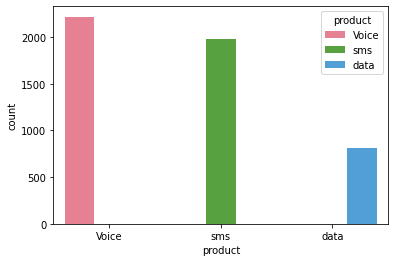

In [ ]:
#plot product parameters
product = sns.countplot(x="product", data=df, palette="husl" , hue = "product" )
#calculating voice, sms , data observations
print(df['product'].value_counts())

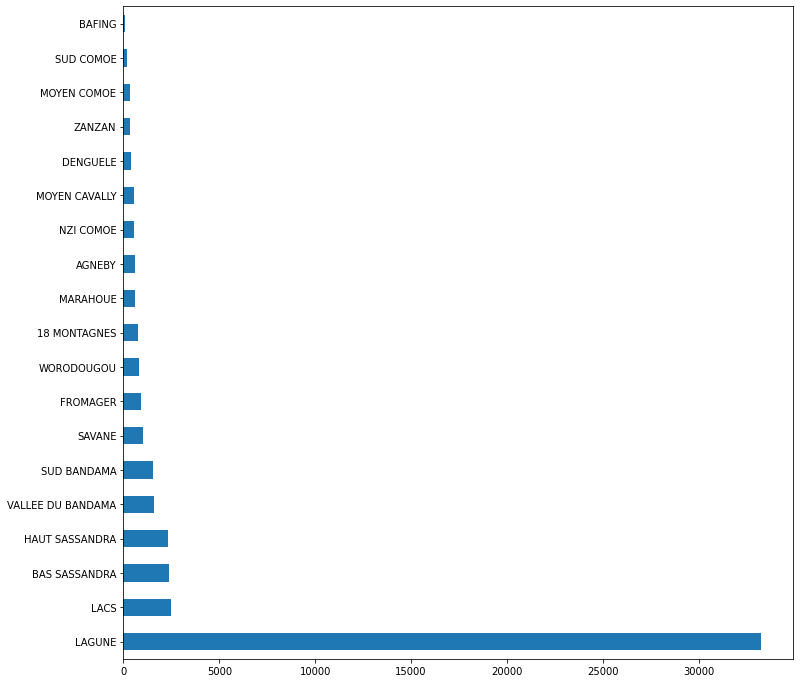

In [ ]:
# Regions with the highest traffic
merged_df['region'].value_counts().plot(kind='barh',   figsize=(12,12))

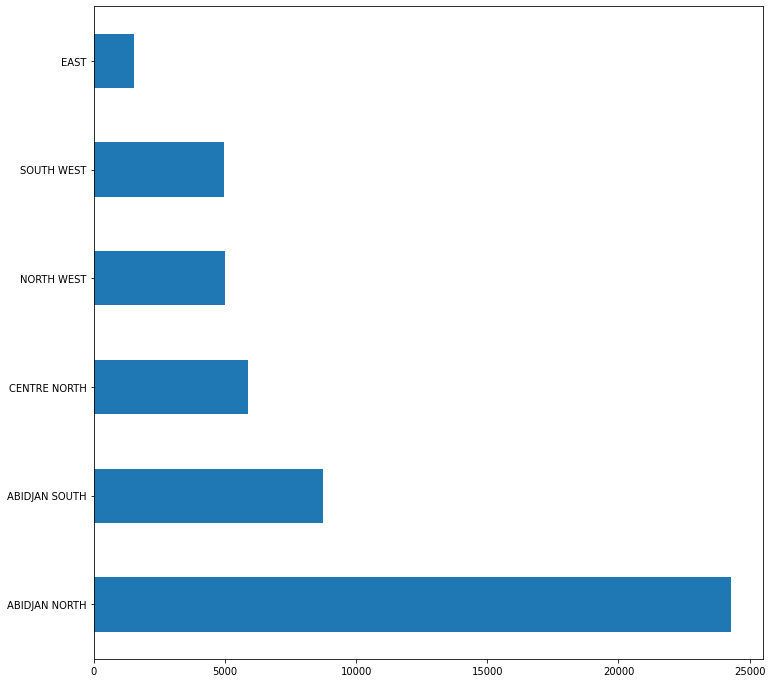

In [ ]:
# area with the highest traffic
merged_df['area'].value_counts().plot(kind='barh',   figsize=(12,12))

**Recommendations**

A high traffic was seen to come from the following regions:

LAGUNE               33261

LACS                  2484

BAS SASSANDRA         2395

HAUT SASSANDRA        2304

VALLEE DU BANDAMA     1575

SUD BANDAMA           1533

SAVANE                 997

FROMAGER               916

WORODOUGOU             795

18 MONTAGNES           783

MARAHOUE               621

AGNEBY                 602

NZI COMOE              571

MOYEN CAVALLY          531

DENGUELE               398

ZANZAN                 336

MOYEN COMOE            321

SUD COMOE              206

BAFING                 102

Name: region, dtype: int64 
